In [1]:
### JUPYTER NOTEBOOK / MODULE PATH FIX ###
import sys

if "/share/apps/python/3.8.6/intel/lib/python3.8" in sys.path and sys.path[1] == '':
    sys.path[1], sys.path[6] = sys.path[6], sys.path[1]

In [2]:
from jtb_2022_code.figure_1 import plot_figure_1
from jtb_2022_code import FigureSingleCellData

In [3]:
## LOAD AND PROCESS UMAP FOR UMAP PANELS ###
data = FigureSingleCellData()
data.do_projections()

Reading Single Cell Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_fpr1.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_fpr1.h5ad


In [ ]:
fig = plot_figure_1(data)

In [ ]:

print("Running DESeq2")
de_obj = DESeq2(rapa_bulk, rapa_bulk_meta, "~Time", threads=4).run(fitType = "local", quiet=True)

print("Processing Results")
res = de_obj.multiresults(lambda y: ("Time", y, "0.0"), rapa_bulk_times(), "Time", lfcThreshold=FIGURE_1A_LFC_THRESHOLD)
plot_genes = res.loc[res['padj'] < FIGURE_1A_PADJ_THRESHOLD, :].index.unique()
plot_genes = res.loc[res.index.isin(plot_genes), :].pivot(columns="Time", values="log2FoldChange").reindex(rapa_bulk_times(include_0=True), axis=1).fillna(0)

print("Clustering Results")
plot_hclust = hclust(plot_genes)
plot_y_order = plot_hclust['labels'][plot_hclust['order'] - 1]
plot_genes = plot_genes.reindex(plot_y_order, axis=0)

In [18]:
gb

,YAL068C,YAL067C,YAL065C,YAL064W-B,YAL064C-A,YAL064W,YAL063C-A,YAL063C,YAL062W,YAL061W,...,YPR193C,YPR194C,YPR196W,YPR198W,YPR199C,YPR200C,YPR201W,YPR202W,YPR203W,YPR204W
0,0,1,0,0,0,1,1,4,11,4,...,2,2,1,17,17,2,1,0,0,0
1,0,2,1,0,0,0,1,1,11,3,...,2,8,1,8,19,2,0,0,0,0
2,0,0,0,0,0,0,2,4,11,5,...,1,2,0,8,13,1,2,1,0,0
3,0,0,0,0,0,2,0,1,18,7,...,3,3,2,16,22,1,0,1,0,0
4,0,0,0,0,0,2,0,3,19,2,...,1,3,0,18,14,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,0,1,0,0,1,1,3,11,183,42,...,29,45,12,91,55,14,4,0,0,0
1146,0,2,1,0,0,0,3,24,193,59,...,32,61,12,96,67,14,3,1,0,0
1147,0,0,1,0,0,1,3,21,160,37,...,40,47,18,94,53,10,3,0,0,1
1148,0,2,0,0,1,0,0,23,184,43,...,36,52,18,87,69,7,5,0,1,0


Running DESeq2 (Experiment 1) on 574 observations
Running DESeq2 (Experiment 2) on 576 observations


In [27]:
print("Clustering Results")
plot_hclust = hclust(plot_matrix[1])
plot_y_order = plot_hclust['labels'][plot_hclust['order'] - 1]
plot_matrix[1] = plot_matrix[1].reindex(plot_y_order, axis=0)
plot_matrix[2] = plot_matrix[2].reindex(plot_y_order, axis=0)

Clustering Results


<ipython-input-88-5d098cf92084>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


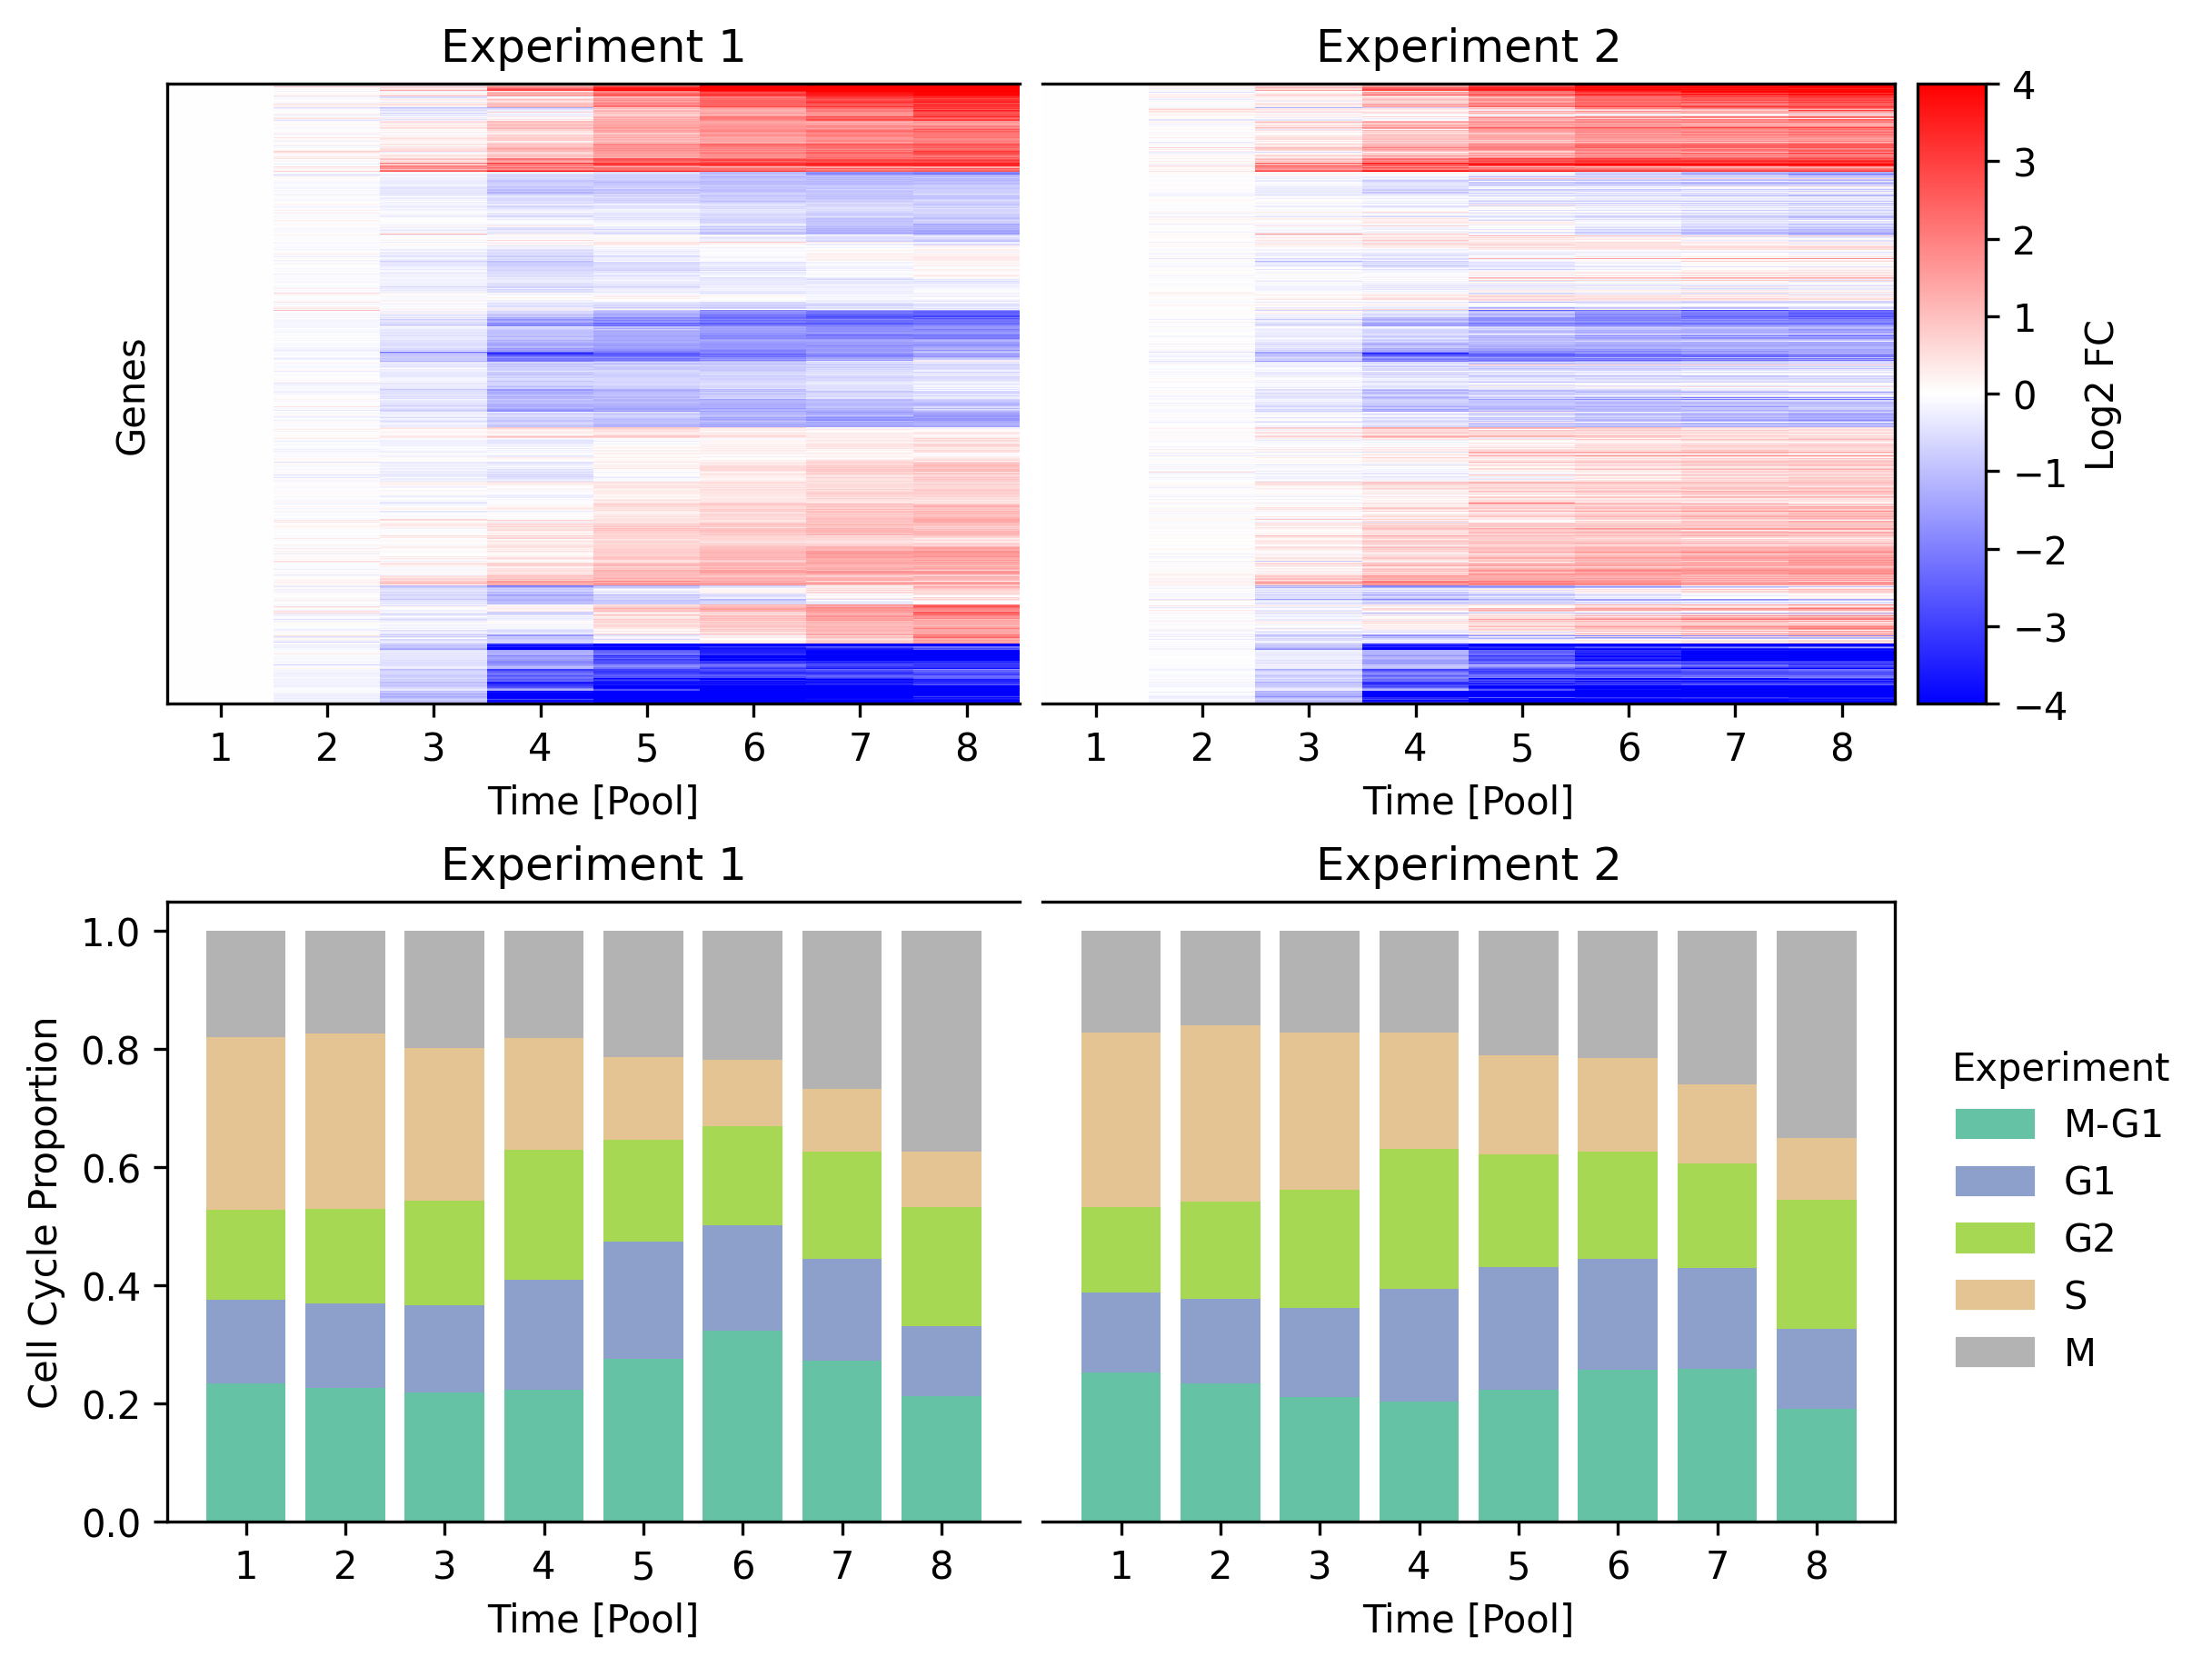

In [76]:
cc_counts = data.expt_data[(1, "WT")].obs[['CC', 'Pool']].value_counts()
pool_counts = data.expt_data[(1, "WT")].obs[['Pool']].value_counts()
cc_props = cc_counts.divide(pool_counts)
cc_props.loc[(slice(None), "M-G1")]

Pool
1    0.234885
2    0.225918
3    0.219331
4    0.223688
5    0.275748
6    0.323428
7    0.272940
8    0.213231
dtype: float64